<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/yolov3_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요

# 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/yolo/"  ### [중요!!] Colab의 경우, 파일을 저장한 위치를 기록하시오.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import cv2

classes = []
f=open(dir+'coco.names.txt', 'r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

In [ ]:
yolo_model=cv2.dnn.readNet(dir+'yolov3.weights',dir+'./yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

In [ ]:
img=cv2.imread(dir+'yolo_test33.jpg')
height,width,channels=img.shape
blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

yolo_model.setInput(blob)
output3=yolo_model.forward(out_layers)

In [ ]:
class_ids,confidences,boxes=[],[],[]
for output in output3:
    for vec85 in output:
        scores=vec85[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence>0.5: # 신뢰도가 50% 이상인 경우만 취함
            centerx,centery=int(vec85[0]*width),int(vec85[1]*height)  # [0,1] 표현을 영상 크기로 변환
            w,h=int(vec85[2]*width),int(vec85[3]*height)
            x,y=int(centerx-w/2),int(centery-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h=boxes[i]
        text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
        cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

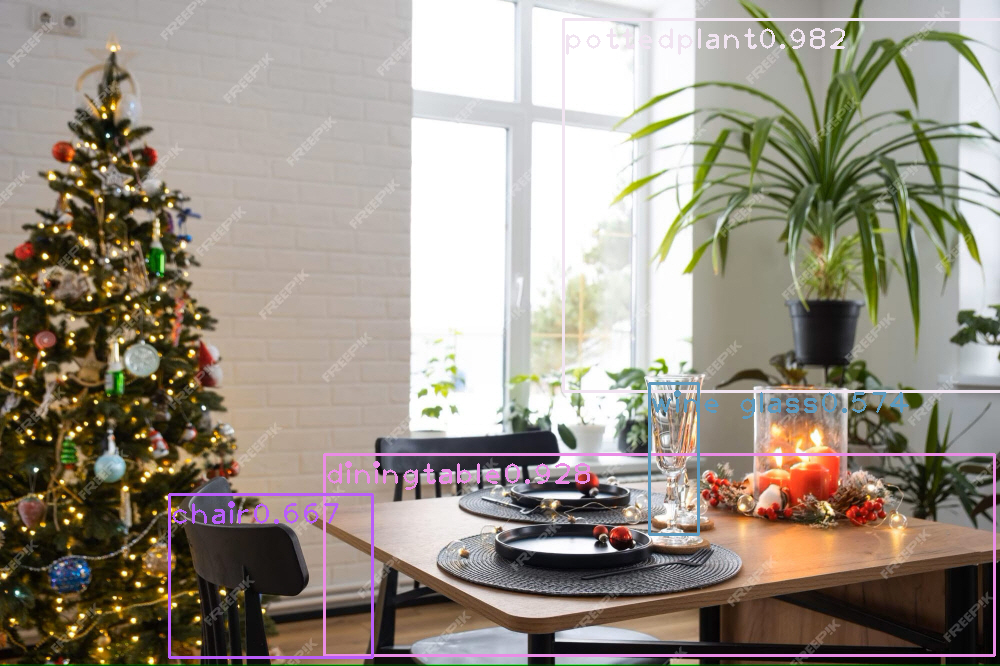

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)